<center><h1>The Aspiring Retailer's Guide to the UK Business Environment</h1></center>

<img src="https://wallpaperaccess.com/full/656670.jpg" alt="Olympic logo" width="500" height="300" >

<h2>|| Introduction</h2>

In the era of rapid technological development, consumer buying trends are subject to frequent changes. Next-day delivery, label-free returns, click-and-collect, etc.,  are just a few of the shopping commodities that now are being taken for granted.<br>

It appears that customer behaviour is largely guided by intuition and emotionality, leaving less space for rational reasoning. Would it not make more sense to shop at your local bakery store rather than head for the supermarket and get the mass-produced loaves?  This is a clash of convenience with aesthetics, with the former often being the winner.<br>

The current business environment seems double-sided. On one side, it is a field of opportunities with many new technological solutions at an entrepreneurs disposal, but on the other – a sort of a gambling game with uncertainty in the outcome.<br>

Our mission in this project is to visualise some of the national retail statistics and business demography data to provide an introduction to this competitive field. Our findings would serve as an initial guide for those who are due to start their entrepreneurial journey. <br>



<h2>|| Data </h2>

We will source data from:<br>
- The UK Office for National Statistics (ONS) <a href="https://www.ons.gov.uk/businessindustryandtrade/retailindustry/datasets/poundsdatatotalretailsales"> Retail sales pounds data</a> dataset. 
- The ONS <a href = "https://www.ons.gov.uk/businessindustryandtrade/business/activitysizeandlocation/datasets/businessdemographyreferencetable">Business demography</a> dataset.

<h2>|| Analysis </h2>

As our datasets are of high quality, we will focus less on data cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scipy
from scipy import stats

In [2]:
from scipy.stats import norm
import statistics 

<h4>|1| Small and Large Retail Business Sales Time Series</h4>

In this task, we will visualise the yearly sales amount time series for both small and large retailers from 1986 to the present.

In [3]:
lrg_sml = pd.read_excel("per_lsb.xls", index_col = False, header = 0)

In [4]:
lrg_sml.head(5)

,Year,Large Businesses,Small Businesses
0,1986,63774810,46615037
1,1987,68015770,48731240
2,1988,74973269,53420453
3,1989,79891577,58021380
4,1990,85416219,62421709


In [5]:
year  = lrg_sml["Year"]
large = lrg_sml["Large Businesses"]
small = lrg_sml["Small Businesses"]

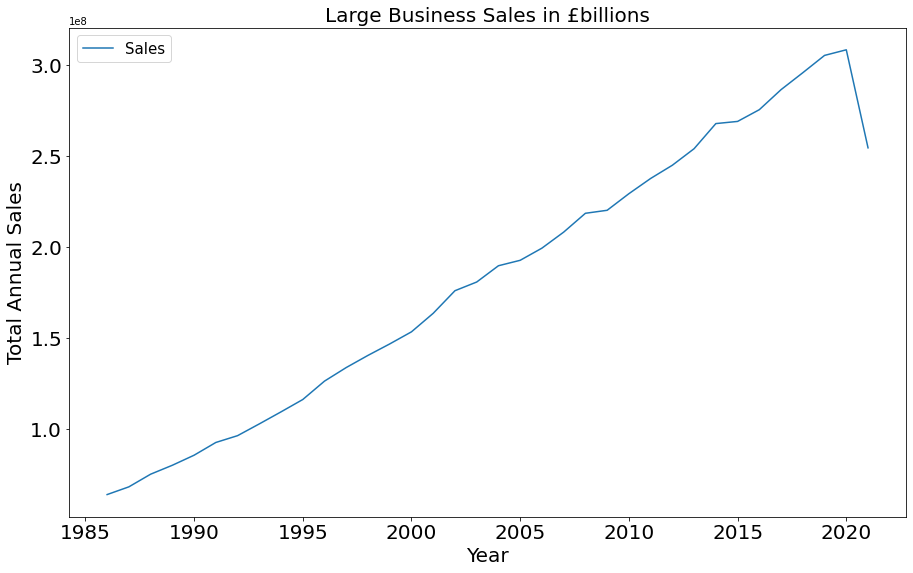

In [21]:
plt.plot(year,large,label="Sales")
plt.title("Large Business Sales in £billions",size=20)
plt.xlabel("Year",size=20)
plt.xticks(size=20)
plt.ylabel("Total Annual Sales",size=20)
plt.yticks(size=20)
plt.gcf().set_size_inches(15, 9)
plt.legend(prop={"size":15})
plt.show()

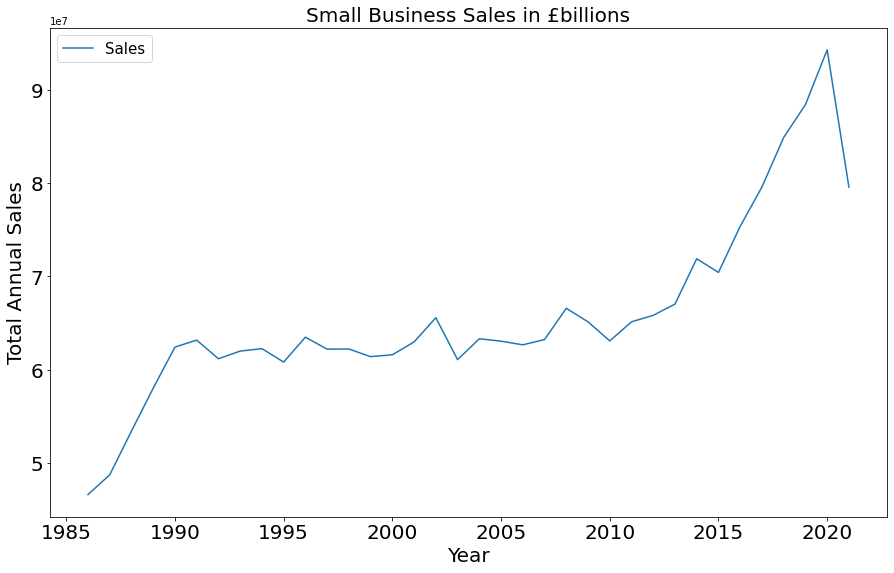

In [20]:
plt.plot(year,small,label="Sales")
plt.title("Small Business Sales in £billions",size=20)
plt.xlabel("Year",size=20)
plt.xticks(size=20)
plt.ylabel("Total Annual Sales",size=20)
plt.yticks(size=20)
plt.gcf().set_size_inches(15, 9)
plt.legend(prop={"size":15})
plt.show()

The graphs above have revealed astounding patterns. It appears that throughout the timeline large businesses revenue has been growing almost linearly, while the small businesses most of the time have been on a plateau. 

Please note that the apparent “dips” on the far right on both graphs relate to the recent, negative economic events. 


<h4>|2|Business survival rates</h4>

Now, let us compare new business survival rates in retail and other similar industries. Our data covers the period from 2015 to 2020. The knowledge of on average how businesses evolve in their very first years of operation can be a good indicator of the challenges that await new entrepreneurs.  

In [18]:
y5_surv = pd.read_excel("5y_surv.xls", header=1)

In [12]:
y5_surv

,Business type,Retail trade,Food and beverage services,Wholesale trade,Accommodation,Programming and consultancy,Information services
0,Initial,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1-year,92.617305,92.844523,89.486318,85.502959,95.315645,84.857143
2,2-year,71.911322,68.175795,66.634662,69.526627,81.061299,60.857143
3,3-year,56.973741,50.684629,51.032165,59.171598,66.532479,45.714286
4,4-year,47.481705,39.244700,43.158905,52.366864,56.834401,38.571429
5,5-year,40.464916,31.404594,36.917907,46.745562,49.149131,32.857143


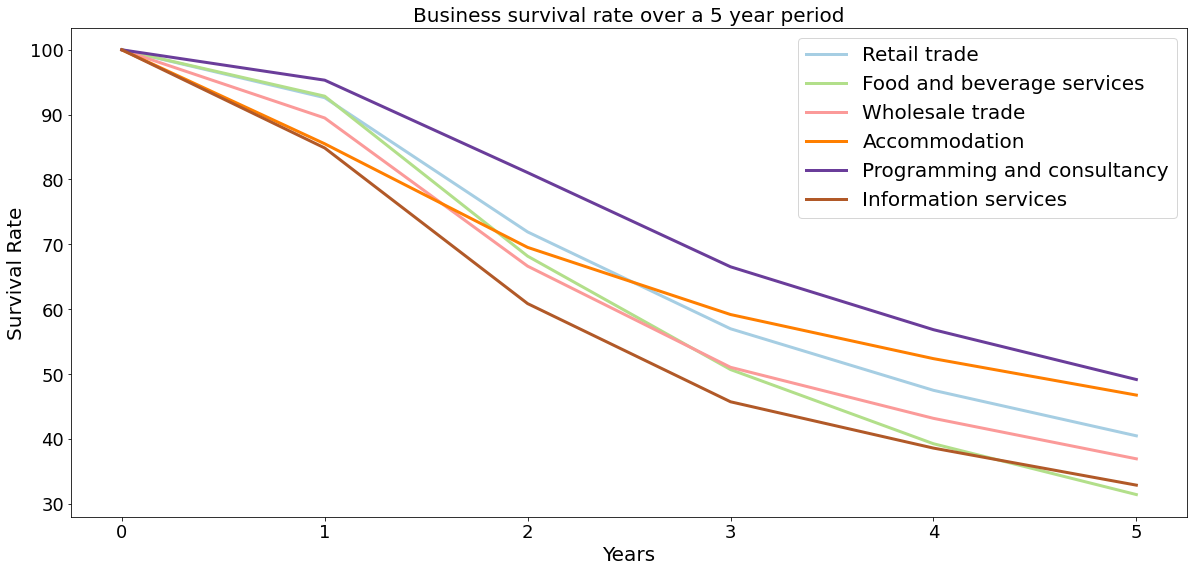

In [36]:
y5_surv.plot(colormap='Paired', linewidth=3, fontsize=18, figsize=(20,9))

plt.xlabel('Years', fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)
plt.title("Business survival rate over a 5 year period",size=20)
plt.legend(prop={"size":20})
plt.show()

As it appears, across all industries there is a stable tendency of a gradual new business closure. The lowest survival rate is in the Food and beverage sector (31.4%), and the highest – in Programming and consultancy (49.1%).

This unfortunately suggests that there is almost a 45-50% chance that your newly established business will cease operating in around five years.


<h4>|3|Survival rates across all businesses</h4>

In the previous task we explored business survival time series for just a few similar sectors. Now, let us take a nationwide perspective and consider all industries. To visualise this, we will plot a probability distribution curve.

In [8]:
allBusinessSurvival = pd.read_excel("allSurv.xls")

In [9]:
x_ax = allBusinessSurvival["5Y"]

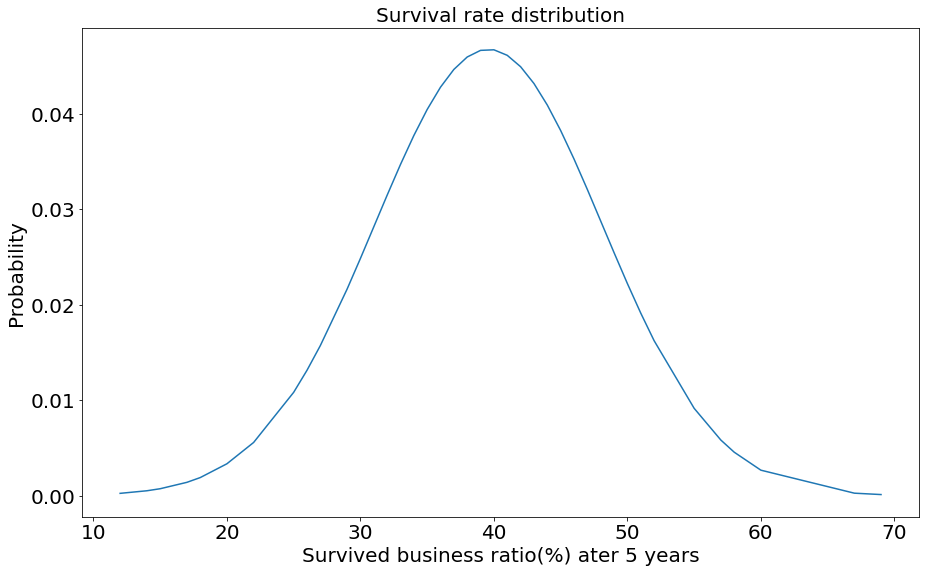

In [12]:
mean = statistics.mean(x_ax)
sd = statistics.stdev(x_ax)
plt.plot(x_ax, norm.pdf(x_ax, mean, sd))
plt.title("Survival rate distribution",size=20)
plt.xlabel("Survived business ratio(%) ater 5 years",size=20)
plt.ylabel("Probability",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.gcf().set_size_inches(15, 9)
plt.show()

The graph shows us that on average only 40% of new businesses survive to their 5th year. Please notice the almost perfect symmetry of the distribution; it suggests that we are observing a natural, systematic tendency. 

<h4>|4| The Inflation and Sales</h4>

Inflation is one of the economic factors that can have an immediate effect on a business, as the customer personal income often takes time to “catch up” with the rising costs of living. Let us check whether there is a correlation between the fluctuations of the inflation rate and the business income. 

In [4]:
inflation = pd.read_excel("pr2_corr.xls")

In [7]:
inflation.head(5)

,Year,Inflation,Large Businesses,Small Businesses
0,1989,5.7,79891577,58021380
1,1990,8.0,85416219,62421709
2,1991,7.5,92425442,63170707
3,1992,4.6,96171095,61176998
4,1993,2.6,102641017,61995391


In [19]:
inflation[["Large Businesses","Small Businesses"]].corrwith(inflation["Inflation"],method="pearson")

Large Businesses   -0.544497
Small Businesses   -0.307347
dtype: float64

The Pearson correlation coefficients for both large and small businesses indicate a moderate, negative correlation. Therefore, we can consider that a rise in the inflation rate can result in reduced sales. 

<h4>|5| Business Births by Region</h4>

In this final task, we will visualise the business birth rates across all UK regions. This visualisation could serve as a geographical guide for those considering the viability of their business in a certain area.  

In [4]:
birth_reg = pd.read_excel("pr2_birth_region.xls", header = 1, index_col=0)

In [5]:
birth_reg

,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Year,,,,,,,,,,,,
2015,9635,36500,25140,25345,29350,35440,100920,55585,26150,11525,21725,5440
2016,10180,42035,26775,24630,34695,45400,102135,55955,31775,12115,22270,5935
2017,9495,44730,22600,22390,30685,36685,91880,51580,25235,12705,20770,6850
2018,9440,39140,23110,22770,30840,35685,93895,52330,24095,12385,20575,5900
2019,9795,39205,24570,24370,36005,36040,99545,54795,25350,12265,21665,6625
2020,9520,37780,23880,24030,29660,32015,89270,50760,24735,11905,17795,6375


In [7]:
names=enumerate(list(birth_reg.columns))
year = list(birth_reg.index)

In [8]:
names

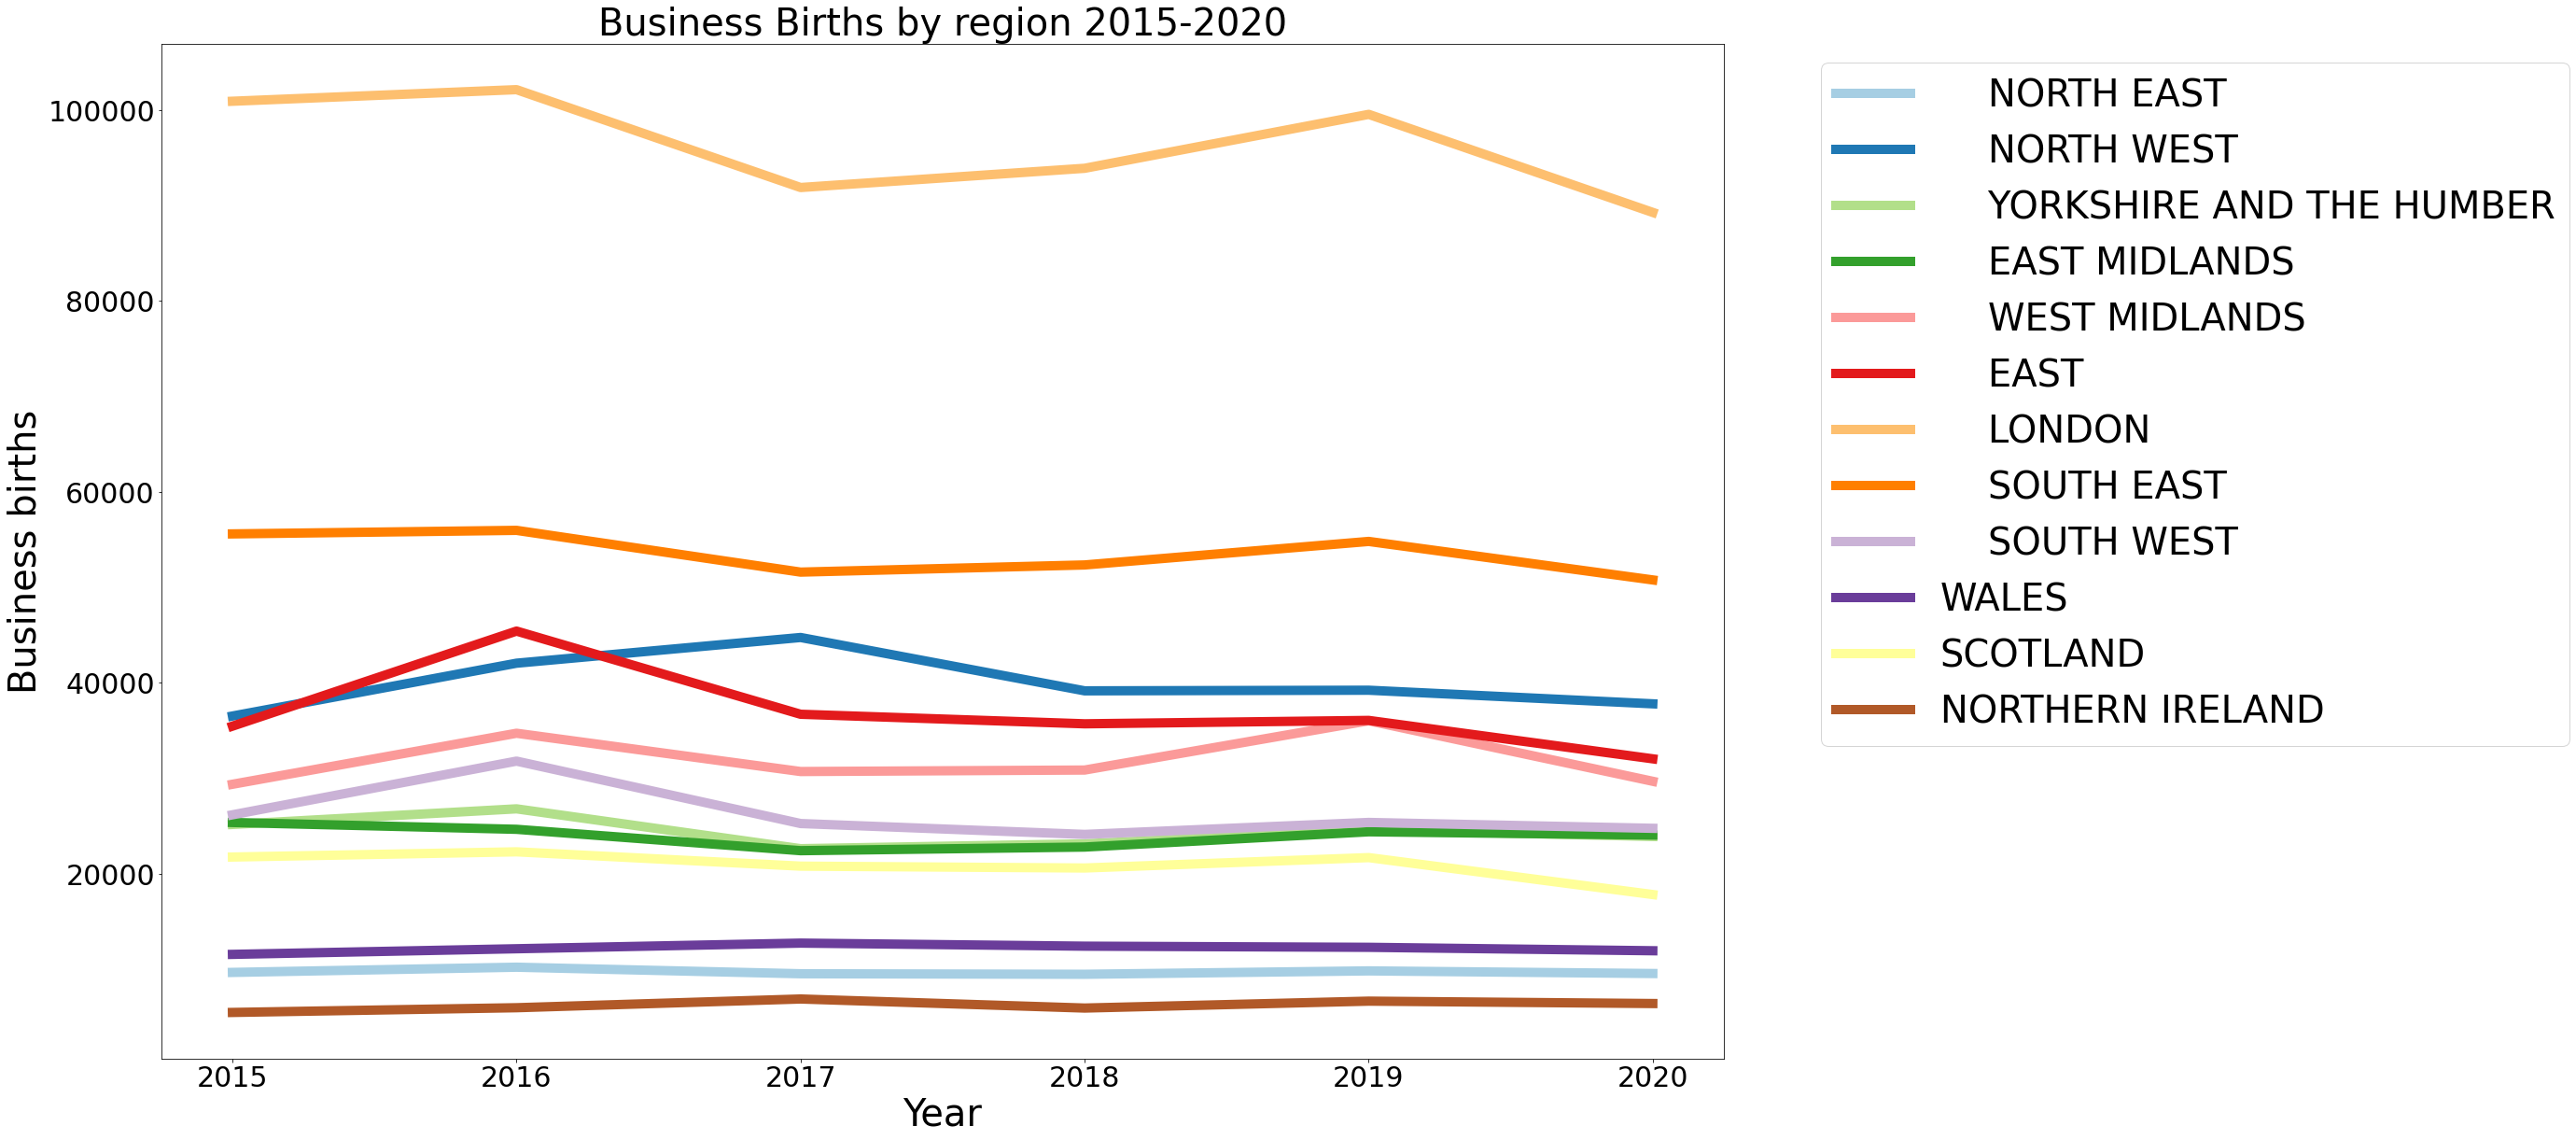

In [9]:
birth_reg.plot(colormap='Paired', linewidth=10, fontsize=18, figsize=(30,20))

plt.xlabel('Year', fontsize=40)
plt.ylabel('Business births', fontsize=40)
plt.title("Business Births by region 2015-2020",fontsize=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.legend(prop={"size":40},bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

As expected, London and South East top the chart, and the less-populated regions cluster at the bottom. This chart represents only the total annual number of business births. Therefore, for a deeper understanding, for each region, we can calculate and visualise the ratio of business births to the population size.

In [25]:
birth_ratio = pd.read_excel("pr2_birth_ratio.xls")

In [26]:
regions = list(birth_ratio["Region"])

In [27]:
ratio  = list(birth_ratio["Ratio"])

(0.001, 0.012)

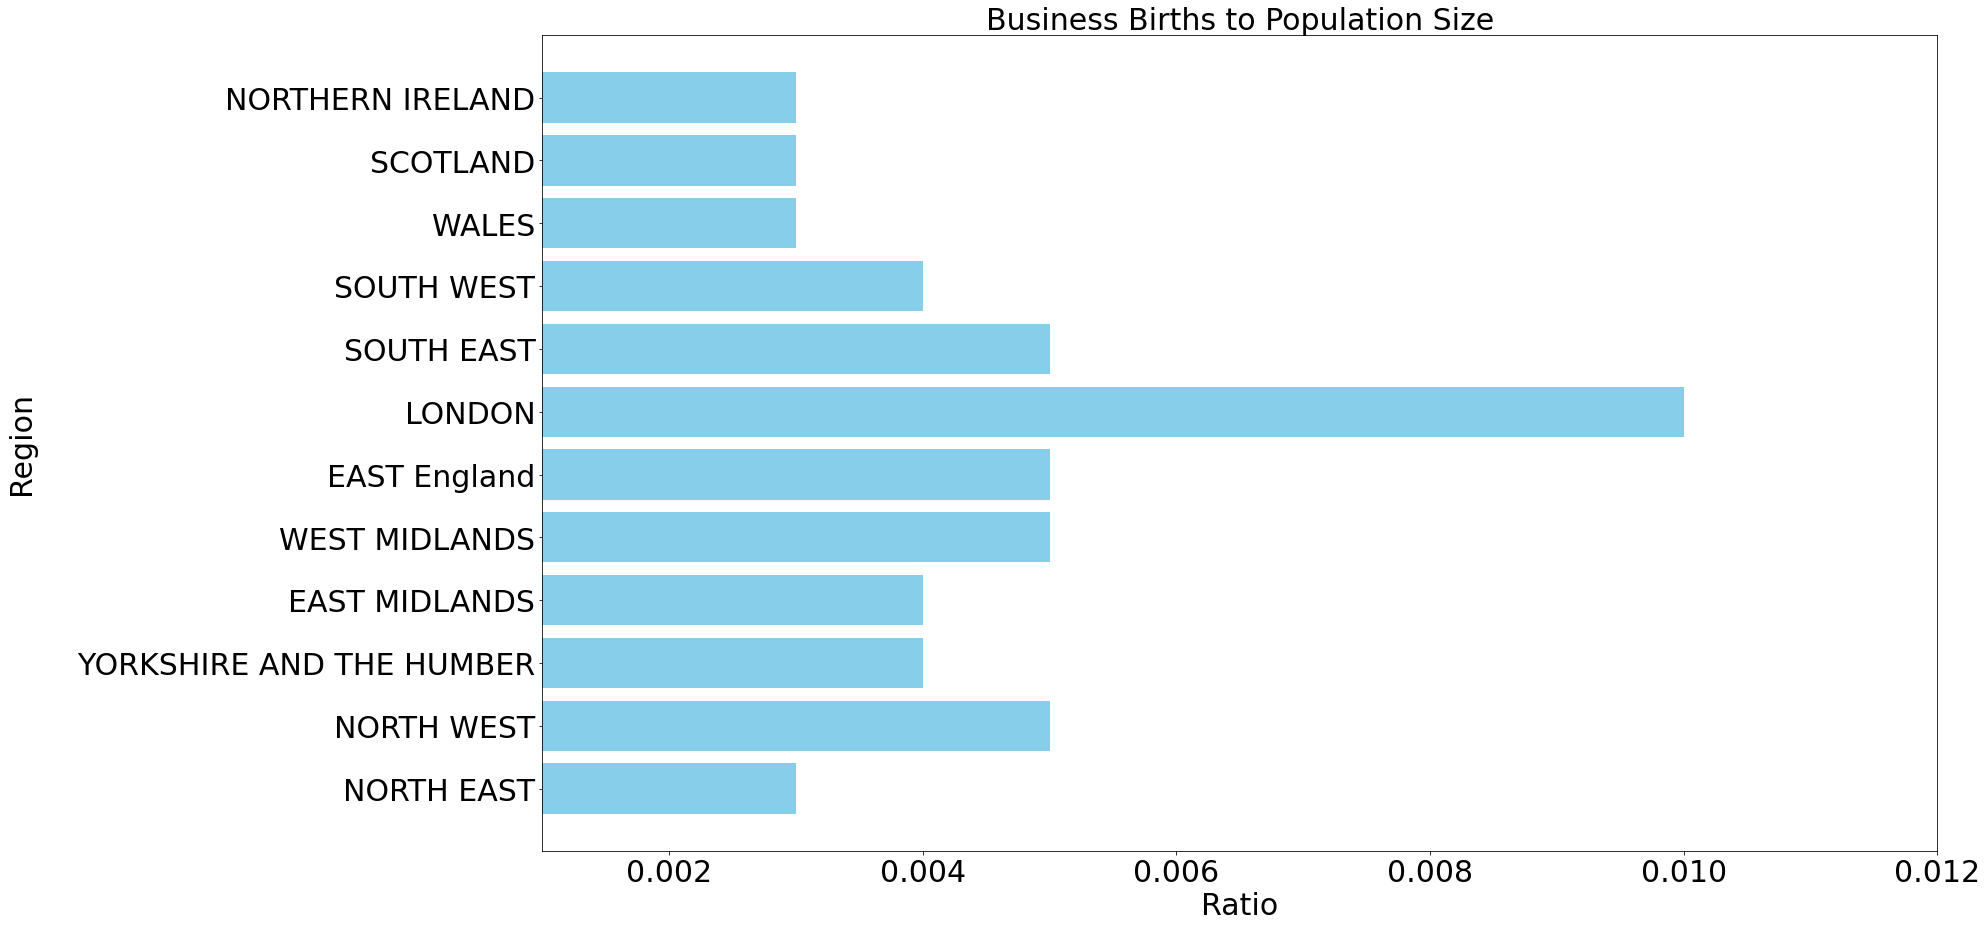

In [28]:

plt.figure(figsize=(25,15))
plt.barh(regions,ratio,color='skyblue')
plt.title("Business Births to Population Size", fontsize=30)
plt.ylabel("Region",fontsize=30)
plt.xlabel("Ratio",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([0.001,0.012])




The data shown in the table is for the year 2018. Even though London has a large population, there are significantly more companies per inhabitant than in any other region of the UK. There is even a popular term used in media – “London-centric Britain”. London generates about 22% of the country’s GDP, but accounts only for 12.5% of the population.

<h3>Conclusion</h3> <br><br>
The UK business trends that we have just analysed do not yet form a detailed, comprehensive guide on what to consider before establishing a business. Nevertheless, we have undoubtedly conveyed the general status quo in the economy.<br><br>
Based on our findings, we can conclude that a new entrepreneur as well as being enthusiastic, should also stay rational and consider the rigid economic patterns that we have just presented. An informed approach to making business will help avoid taking knowingly risky steps.<br><br>
The summary of our findings is as follows:<br><br>
•	The sales of large companies grow almost linearly compared to the         oscillating growth rates of the smaller business sector.<br><br> 
•	On average less than half of newly established companies survive to their fith year. <br><br>
•	There is a significant geographical divide in the economy.
